In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
import joblib

In [2]:

set_config(transform_output="pandas")

In [5]:
# data and model paths



data_path = "../data/interim/df_without_outliers.csv"

kmeans_path = "../models/mb_kmeans.joblib"
scaler_path = "../models/scaler.joblib"
encoder_path = "../models/encoder.joblib"
model_path = "../models/model.joblib"

In [6]:


# load the data

df = pd.read_csv(data_path, usecols=["pickup_longitude","pickup_latitude"])

df.shape



(33234199, 2)

In [7]:


# load the scaler and model

scaler = joblib.load(scaler_path)
kmeans = joblib.load(kmeans_path)



/home/kibria/dl_env/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.7.1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/kibria/dl_env/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator MiniBatchKMeans from version 1.7.1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [8]:
# scale the input data

df_scaled = scaler.transform(df)

df_scaled.head()

,pickup_longitude,pickup_latitude
0,-0.443778,-0.601549
1,-0.182839,-0.777271
2,-0.285388,-2.626699
3,-0.528059,-1.178462
4,0.365612,1.111533


In [9]:
# get the cluster predictions

predictions = kmeans.predict(df_scaled)

/home/kibria/dl_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  warnings.warn(


In [10]:
# add the predictions to data

df['region'] = predictions

df.head()

,pickup_longitude,pickup_latitude,region
0,-73.990372,40.734695,1
1,-73.980782,40.729912,1
2,-73.984550,40.679565,17
3,-73.993469,40.718990,14
4,-73.960625,40.781330,0


In [11]:
# form a region grp

region_grp = df.groupby("region")

In [12]:
# sample the data from each region

sampled_data = (
    region_grp
    .sample(500, random_state=42)
)


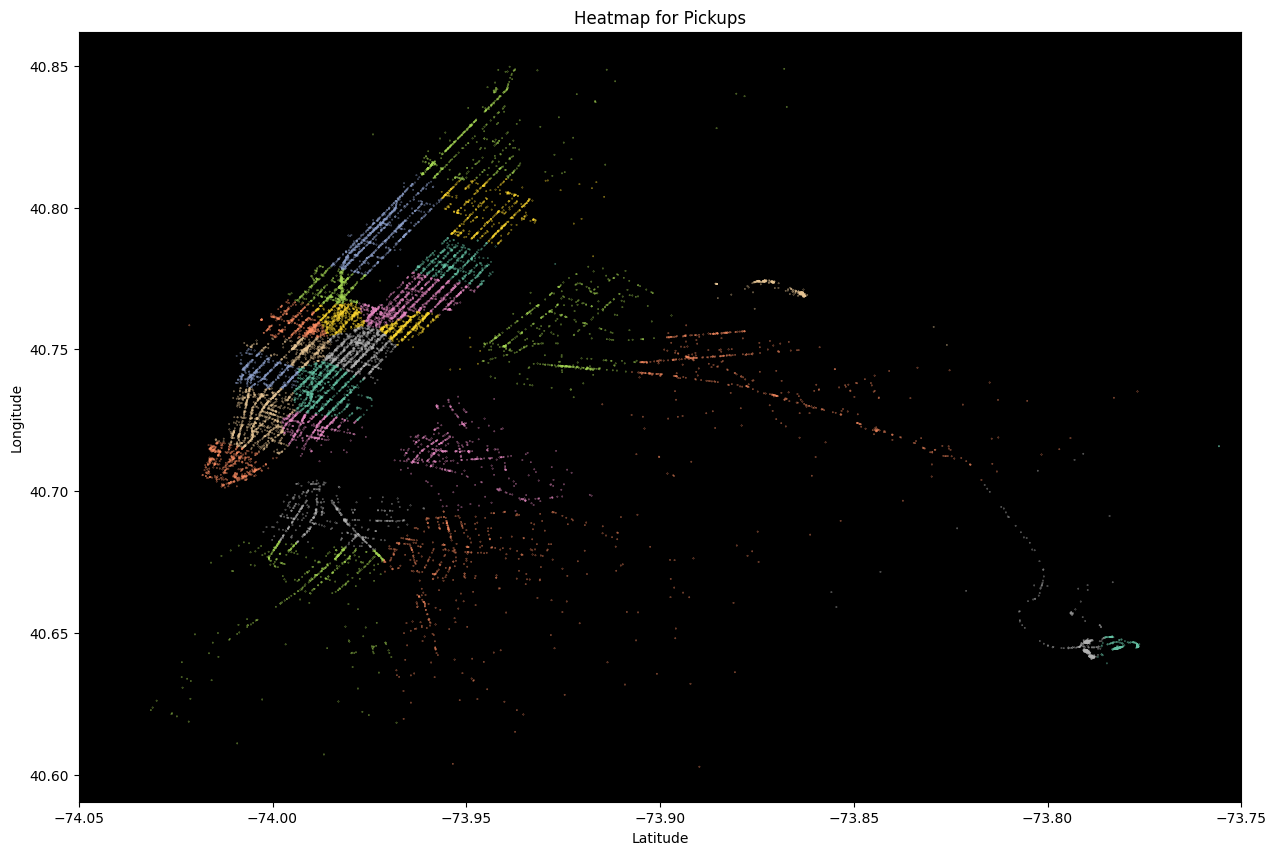

In [13]:
# plot the sampled data on scatterplot

fig,ax = plt.subplots(nrows=1,ncols=1,sharey=True,
                     figsize=(15,10))

ax.set_facecolor('k')
ax.set_xlim(left=-74.05, right=-73.75)

ax.scatter(sampled_data['pickup_longitude'],sampled_data['pickup_latitude'],
           s=0.05,c=sampled_data['region'],cmap="Set2")
ax.set_title('Heatmap for Pickups')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')

plt.show()

In [14]:
# save the sampled data

save_path = "../data/external/plot_data.csv"

sampled_data.to_csv(save_path, index=False)

In [15]:
# load the test data

data_path = "../data/processed/test.csv"

test_df = pd.read_csv(data_path, parse_dates=["tpep_pickup_datetime"]).set_index("tpep_pickup_datetime")

test_df

,lag_1,lag_2,lag_3,lag_4,region,total_pickups,avg_pickups,day_of_week
tpep_pickup_datetime,,,,,,,,
2016-03-01 00:00:00,38.0,58.0,77.0,90.0,0,51,58.0,1
2016-03-01 00:15:00,51.0,38.0,58.0,77.0,0,27,46.0,1
2016-03-01 00:30:00,27.0,51.0,38.0,58.0,0,31,40.0,1
2016-03-01 00:45:00,31.0,27.0,51.0,38.0,0,21,32.0,1
2016-03-01 01:00:00,21.0,31.0,27.0,51.0,0,24,29.0,1
...,...,...,...,...,...,...,...,...
2016-03-31 22:45:00,72.0,41.0,46.0,74.0,29,62,59.0,3
2016-03-31 23:00:00,62.0,72.0,41.0,46.0,29,69,63.0,3
2016-03-31 23:15:00,69.0,62.0,72.0,41.0,29,66,64.0,3


In [16]:


# split the data

X_test = test_df.drop(columns=["total_pickups"])
y_test = test_df["total_pickups"]

X_test



,lag_1,lag_2,lag_3,lag_4,region,avg_pickups,day_of_week
tpep_pickup_datetime,,,,,,,
2016-03-01 00:00:00,38.0,58.0,77.0,90.0,0,58.0,1
2016-03-01 00:15:00,51.0,38.0,58.0,77.0,0,46.0,1
2016-03-01 00:30:00,27.0,51.0,38.0,58.0,0,40.0,1
2016-03-01 00:45:00,31.0,27.0,51.0,38.0,0,32.0,1
2016-03-01 01:00:00,21.0,31.0,27.0,51.0,0,29.0,1
...,...,...,...,...,...,...,...
2016-03-31 22:45:00,72.0,41.0,46.0,74.0,29,59.0,3
2016-03-31 23:00:00,62.0,72.0,41.0,46.0,29,63.0,3
2016-03-31 23:15:00,69.0,62.0,72.0,41.0,29,64.0,3


In [17]:
encoder = joblib.load(encoder_path)

model = joblib.load(model_path)

/home/kibria/dl_env/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator OneHotEncoder from version 1.7.1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/kibria/dl_env/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator FunctionTransformer from version 1.7.1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/kibria/dl_env/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator ColumnTransformer from version 1.7.1 when using version 1.6.1. Th

In [18]:


from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("encoder", encoder),
    ("model",model)
])

pipe



Pipeline(steps=[('encoder',
                 ColumnTransformer(force_int_remainder_cols='deprecated',
                                   n_jobs=-1, remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['region', 'day_of_week'])])),
                ('model', LinearRegression())])

In [19]:
# get the predictions

predictions = pipe.predict(X_test)

In [20]:
# sample row

sample_row = sampled_data.sample(1)

In [21]:
# scale the coords

scaled_coords = scaler.transform(sample_row.iloc[:,0:2])

scaled_coords

,pickup_longitude,pickup_latitude
25746243,0.804248,1.059124


In [22]:


# calculate the distances from centroids

distances = kmeans.transform(scaled_coords).values.ravel().tolist()



/home/kibria/dl_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  warnings.warn(


In [23]:
distances = list(enumerate(distances))

distances

[(0, 0.24410509944566525),
 (1, 2.1082267833024853),
 (2, 6.645730910553157),
 (3, 1.8149662531955206),
 (4, 3.143018683163269),
 (5, 1.5292387415125352),
 (6, 3.9401918605579582),
 (7, 2.2790499633872265),
 (8, 0.8990754845369034),
 (9, 2.097724943656548),
 (10, 0.8940198533864666),
 (11, 0.5316743701856957),
 (12, 0.961412088265391),
 (13, 2.457079681867543),
 (14, 2.458159166585492),
 (15, 1.1172249392208031),
 (16, 1.5389851092203188),
 (17, 4.176022834644093),
 (18, 0.9915040812332753),
 (19, 1.247969626210297),
 (20, 0.6670314847263042),
 (21, 1.0041656847131581),
 (22, 2.7113359527711642),
 (23, 1.7170481275716112),
 (24, 2.0707870061505966),
 (25, 2.3795363569447634),
 (26, 6.410014234866667),
 (27, 1.3160653932475515),
 (28, 1.5627840026959323),
 (29, 3.459539866453445)]

In [24]:


# sort the distances

indexes = [ind[0] for ind in sorted(distances, key=lambda x: x[1])][0:9]

indexes



[0, 11, 20, 10, 8, 12, 18, 21, 15]